# Let's Predict The Marriage Age


In [28]:
#importing basic libraries
import pandas as pd

import numpy as np

In [29]:
#reading and understanding data
df=pd.read_csv('age_of_marriage_data.csv')
df.head(20)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0
6,7,female,"5'2""",Hindu,Rajput - Lodhi,Hindi,Banking Professional,Jodhpur,India,28.0
7,8,male,"5'5""",Hindu,Bhatia,Punjabi,Entrepreneurs / Business,Faridabad,India,30.0
8,9,female,"5'5""",Jain,Shwetamber,Gujarati,Software Professional,Vadodara,India,35.0
9,10,female,"5'1""",Hindu,Billava,Tulu,HR Professional,Bengaluru / Bangalore,India,32.0


In [30]:
#let's look at the shape and null values
print(df.shape)
df.isnull().sum()


(2567, 10)


id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [31]:
#id is of no use so its better to drop it
df.dropna(inplace=True)

We drop all the null values because we can't guess or impute these values in this type of prediction

In [32]:
a=df.profession.apply(lambda x:x.split()[0])
a.value_counts()
a.apply(lambda x:x.replace('Not','Not Specified') if(x=='Not') else x)
df.profession=a

In [33]:
#dropping id attribue as it is of no use
df.drop('id',axis=1,inplace=True)

In [34]:
#dropping location because in this case location and country will convey same meaning and also we are not going into a lot depth
df.drop('location',axis=1,inplace=True)

In [35]:
df.head()

,gender,height,religion,caste,mother_tongue,profession,country,age_of_marriage
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor,USA,32.0
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs,India,32.0
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,India,30.0
4,male,"5'5""",Christian,Born Again,Malayalam,Sales,India,30.0
5,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,India,29.0


###### Let's do some data engineering 

In [36]:
#the height attribut is in feet'inches" and also as object datatype
#so converting it to float in cm
df.height=df.height.apply(lambda x:x.replace('"',""))
df.height=df.height.apply(lambda x:x.replace("'"," "))

In [37]:
#function to convert height into centimeter
def abc(abc):
    a=abc.split()
    res=int(a[0])*30.48+int(a[1])*2.54
    return res
df.height=df.height.apply(abc)


In [38]:
df.height

1       170.18
2       170.18
3       152.40
4       165.10
5       165.10
         ...  
2561    180.34
2562    160.02
2563    180.34
2564    160.02
2566    157.48
Name: height, Length: 1932, dtype: float64

In [39]:
df

,gender,height,religion,caste,mother_tongue,profession,country,age_of_marriage
1,male,170.18,Jain,Shwetamber,Gujarati,Doctor,USA,32.0
2,male,170.18,Hindu,Brahmin,Hindi,Entrepreneurs,India,32.0
3,female,152.40,Hindu,Thakur,Hindi,Architect,India,30.0
4,male,165.10,Christian,Born Again,Malayalam,Sales,India,30.0
5,male,165.10,Hindu,Valmiki,Hindi,Sportsman,India,29.0
...,...,...,...,...,...,...,...,...
2561,male,180.34,Hindu,Kshatriya,Odia,VP,India,30.0
2562,female,160.02,Hindu,Thakur,Hindi,Banking,India,27.0
2563,male,180.34,Hindu,Thakur,Hindi,Software,Canada,31.0
2564,female,160.02,Hindu,Baishya,Bengali,Software,India,28.0


#### Spliting the data into X and y(predictor and target variable)

In [40]:
#splitting the data
X = df.loc[:,['gender','height','religion','caste','mother_tongue','profession','country']]
y = df.age_of_marriage

In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X[['gender','religion','caste','mother_tongue','profession','country']]=X.loc[:,['gender','religion','caste','mother_tongue','profession','country']].apply(enc.fit_transform)

In [42]:
X

,gender,height,religion,caste,mother_tongue,profession,country
1,1,170.18,2,34,6,22,19
2,1,170.18,1,14,8,25,5
3,0,152.40,1,36,8,7,5
4,1,165.10,0,13,13,64,5
5,1,165.10,1,38,8,68,5
...,...,...,...,...,...,...,...
2561,1,180.34,1,21,18,74,5
2562,0,160.02,1,36,8,9,5
2563,1,180.34,1,36,8,67,3
2564,0,160.02,1,7,2,67,5


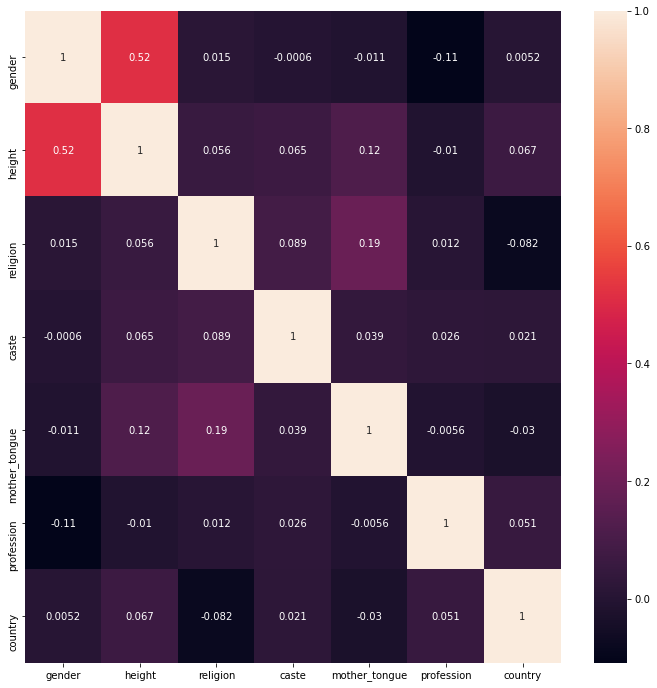

In [43]:
#cehecking the correlation between the varibles
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sb.heatmap(X.corr(),annot=True)

#### Let's do some feature selection

In [44]:
#importing vif to check the best features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,height,15.93
5,profession,4.71
3,caste,4.00
4,mother_tongue,3.79
6,country,3.36
2,religion,3.04
0,gender,2.26


Let's drop height and check the vif again

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,height,11.95
3,caste,4.00
4,mother_tongue,3.79
5,country,3.35
2,religion,3.03
0,gender,2.20


Now everything is fine .Let's proceed

In [61]:

#dropping profession attribute as it is decreasing the accuracy of the model
X.drop('profession',axis=1,inplace=True)

KeyError: "['profession'] not found in axis"

#### Let's do spliting of the varibales into train and test set

In [62]:
#performing train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)


In [63]:
#importing Random Forest for prediction
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=80,max_depth=11)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [64]:
#let's calculate the r2 score 
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6910297558996868

In [65]:
#evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
print('the mean squared error is',mean_absolute_error(y_test,y_predict))
print('the root mean squared error is ',np.sqrt(mean_squared_error(y_test,y_predict)))

the mean squared error is 1.0648723191269929
the root mean squared error is  1.2729811326960536


In [67]:
#importing pickle to dump the model
import pickle 
pickle.dump(model,open('marriage.pkl','wb'))

In [58]:
X_train.columns

Index(['gender', 'height', 'religion', 'caste', 'mother_tongue', 'country'], dtype='object')